<a href="https://colab.research.google.com/github/gellys/quarentena-dados/blob/master/QuarentenaDados_Aula_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 01**

In [40]:
print("Nome do Filme")

Nome do Filme


In [0]:
nome_do_filme = "Ó pai ó 2 - O barrilzão"

In [42]:
nome_do_filme

'Ó pai ó 2 - O barrilzão'

## Importando a biblioteca Pandas

In [0]:
import pandas as pd

## Lendo uma Base de Dados

In [44]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
# Exibindo os 5 primeiros
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
# Lendo a documentação
?filmes

In [46]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [47]:
# Mostra (total de linhas, total de colunas)
avaliacoes.shape

(100836, 4)

In [48]:
#Outra forma de exibir total de linhas
len(avaliacoes)

100836

Substituindo os nomes das colunas de inglês para português :

In [49]:
avaliacoes.columns = ["usuarioId","filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Traz avaliações do filme que o Id é igual a 1

In [50]:
avaliacoes.query("filmeId==1")

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


Trazendo estatítiscas gerais dos dados

In [51]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [52]:
avaliacoes["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

Caso queira uma estatística particular, podemos apenas chamar o método desejado, no caso abaixo calculamos apenas a média das avaliações do filmeId 1.

In [53]:
avaliacoes.query("filmeId==1").mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [54]:
avaliacoes_do_filme_1 = avaliacoes.query("filmeId==1")
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


Obtendo os valores da coluna nota (repare que o tipo retornado é uma Série pandas, por isso o index de cada nota é mantido). Para calcular a média de todas as notas executamos avaliacoes["notas"].mean()

In [55]:
avaliacoes_do_filme_1["nota"].mean()

3.9209302325581397

Calculando a média das notas para todos os filmes, usando o método .groupby(filmeId), o parâmetro passado é para indicar qual coluna ele deve utilizar para "agrupar" os dados.

In [56]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [57]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Como o uso do .groupby não é  uma boa prática pois precisariamos garantir que a nota média seja do respectivo filme.

Será utilizado o .join(), criando um novo dataframe filmes_com_media

In [0]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.rename(columns={'nota':'nota_media'}, inplace=True)

Visualizando o novo dataframe ordenado pela nota e de forma decrescente

In [59]:
filmes_com_media.sort_values("nota_media", ascending=False).head(15)

,filmeId,titulo,generos,nota_media
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


 Plot de alguns gráficos simples :

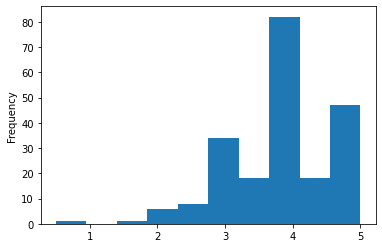

In [60]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')

Com o parâmetro kind do método .plot plota um histograma

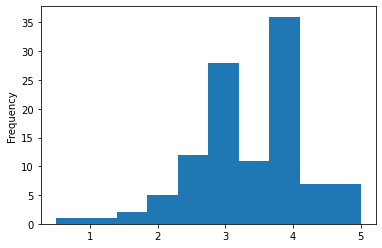

In [61]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist')

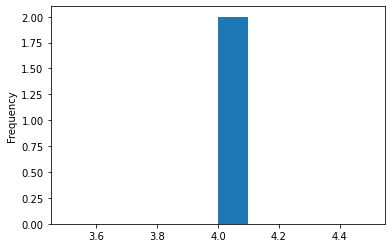

In [62]:
avaliacoes.query("filmeId == 121")["nota"].plot(kind='hist')

In [0]:
#Detalhando os eixos do gráfico

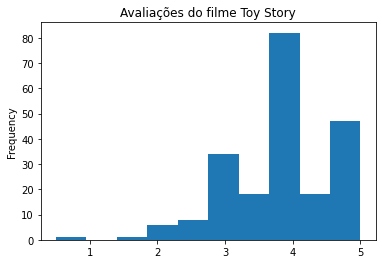

In [64]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist',
                                              title="Avaliações do filme Toy Story")

Utilizando outra ferramenta para manipular gráficos, o matplotlib.

In [0]:
import matplotlib.pyplot as plt

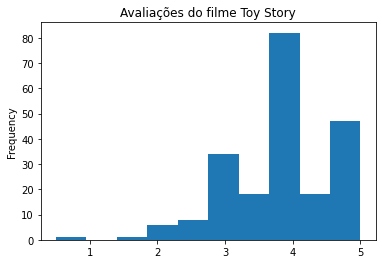

In [66]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

# Exercícios :



# `Desafio 1`

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.

# `Desafio 2`
Mudar o nome da coluna nota do dataframe **filmes_com_media** para **nota_média** após o join.


# `Desafio 3`
Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

# `Desafio 4`
Arredondar as médias (coluna de nota média) para duas casas decimais.

# `Desafio 5`
Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

# `Desafio 6`
Contar o número de aparições de cada genero.

# ` Desafio 7`
Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

In [78]:
# DESAFIO 1
# Quantidade de registros len(filmes_com_media[filmes_com_media["nota_media"].isnull()])
filmes_com_media[filmes_com_media["nota_media"].isnull()]

,filmeId,titulo,generos,nota_media
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


In [71]:
# DESAFIO 2
filmes_com_media.rename(columns={'nota':'nota_media'}, inplace=True)
filmes_com_media.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [81]:
# DESAFIO 3
avaliacao_total_por_filme = avaliacoes.groupby("filmeId")["nota"].count()
filmes_media_e_votos = filmes_com_media.join(avaliacao_total_por_filme, on="filmeId")
filmes_media_e_votos = filmes_media_e_votos.rename(columns={"nota": "total_votos"})
filmes_media_e_votos.head()

,filmeId,titulo,generos,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


In [83]:
# DESAFIO 4
filmes_media_e_votos["nota_media"] = filmes_media_e_votos["nota_media"].round(decimals=2)
filmes_media_e_votos.head()

,filmeId,titulo,generos,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


In [88]:
# DESAFIO 5
generos = filmes_media_e_votos["generos"].str.get_dummies('|')
listando_generos = list(generos)
listando_generos

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [92]:
# DESAFIO 6
total_por_genero = generos.sum()
total_por_genero

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

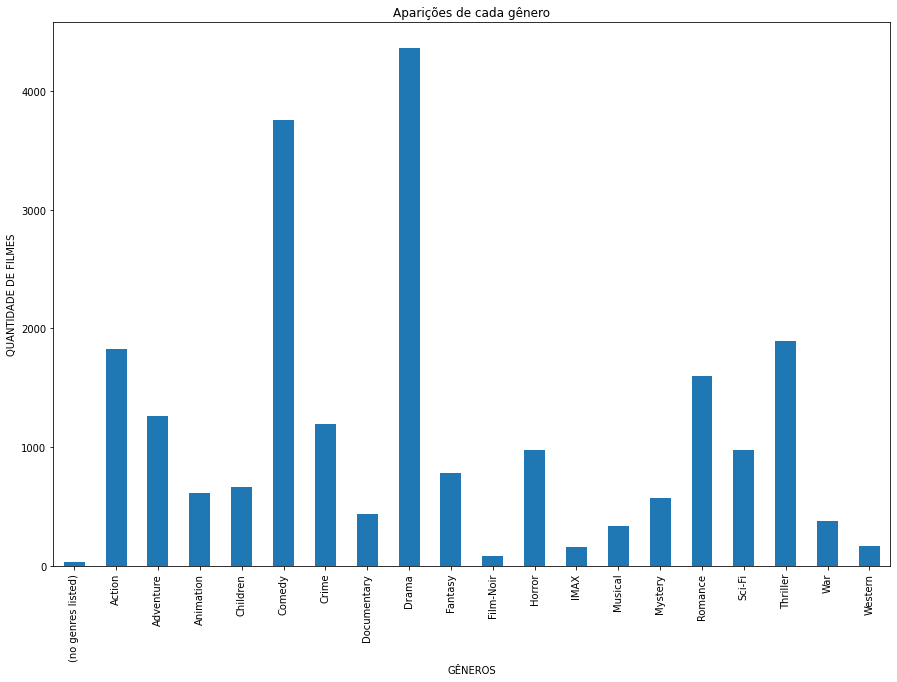

In [113]:
import matplotlib.pyplot as plt

total_por_genero.plot(kind='bar')
plt.rcParams['figure.figsize'] = (15,10)
plt.title("Aparições de cada gênero")
plt.xlabel('GÊNEROS')
plt.ylabel('QUANTIDADE DE FILMES')
plt.show()